# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
#if plotnine is not installed in Jupter then use the following command to install it.

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



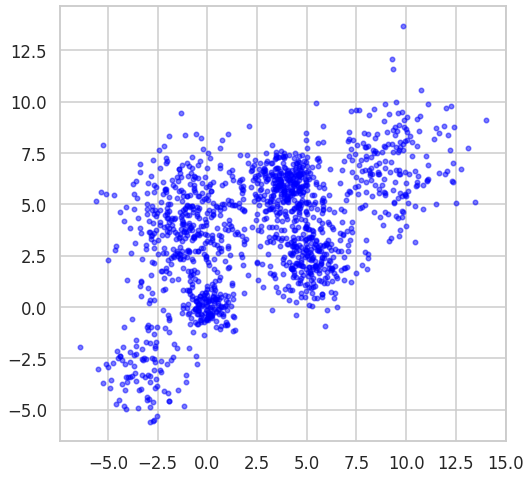

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

For n_clusters = 2 The average silhouette_score is : 0.4751544541991239
For n_clusters = 3 The average silhouette_score is : 0.43631793714185435
For n_clusters = 4 The average silhouette_score is : 0.4628725400351352
For n_clusters = 5 The average silhouette_score is : 0.48100602217073096
For n_clusters = 6 The average silhouette_score is : 0.4862794240733028
For n_clusters = 7 The average silhouette_score is : 0.46340972197949165


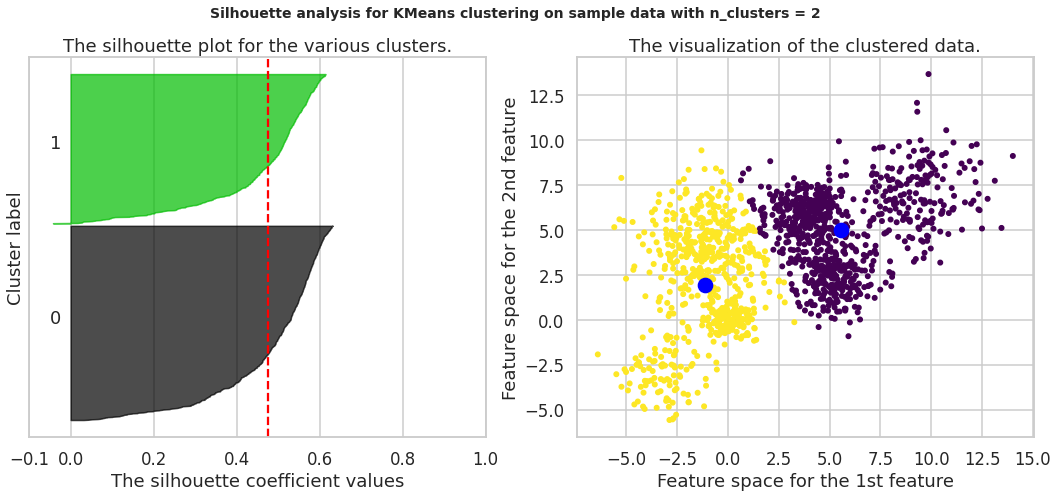

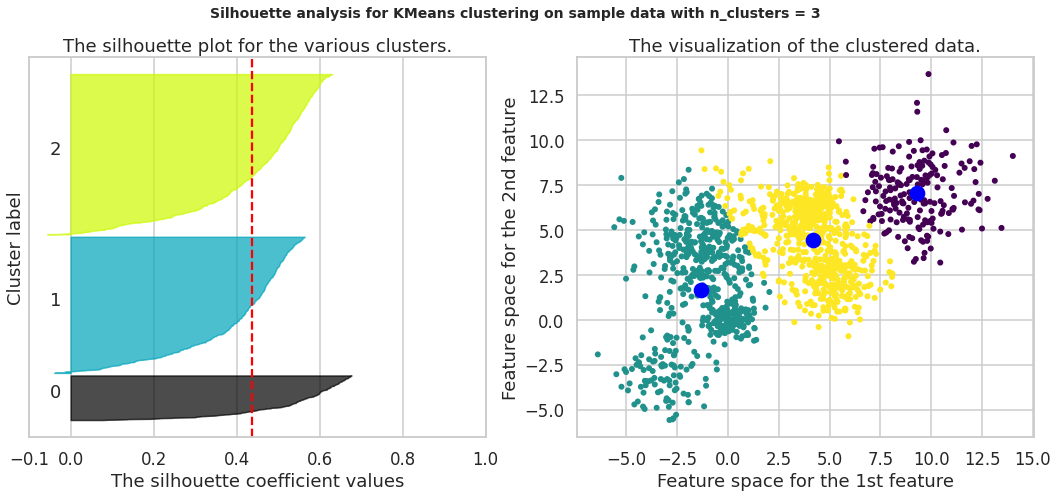

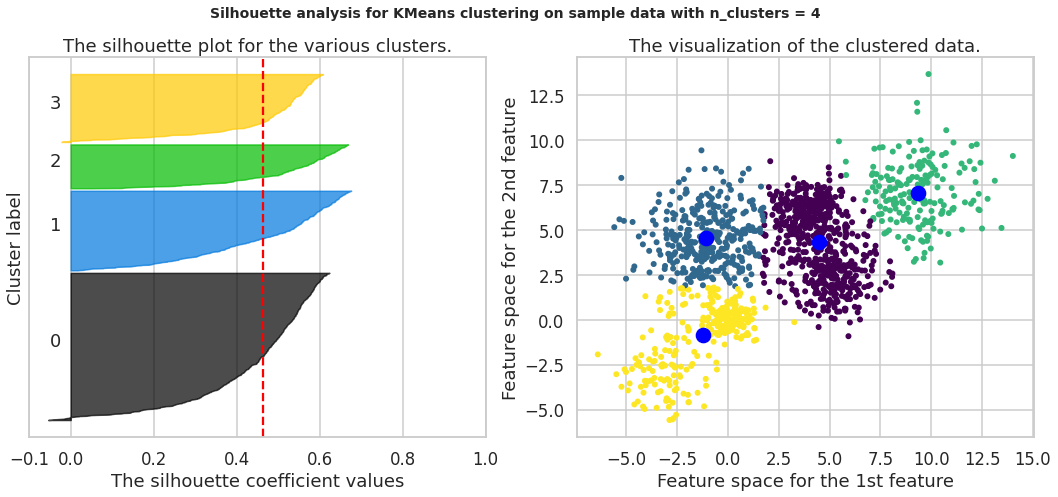

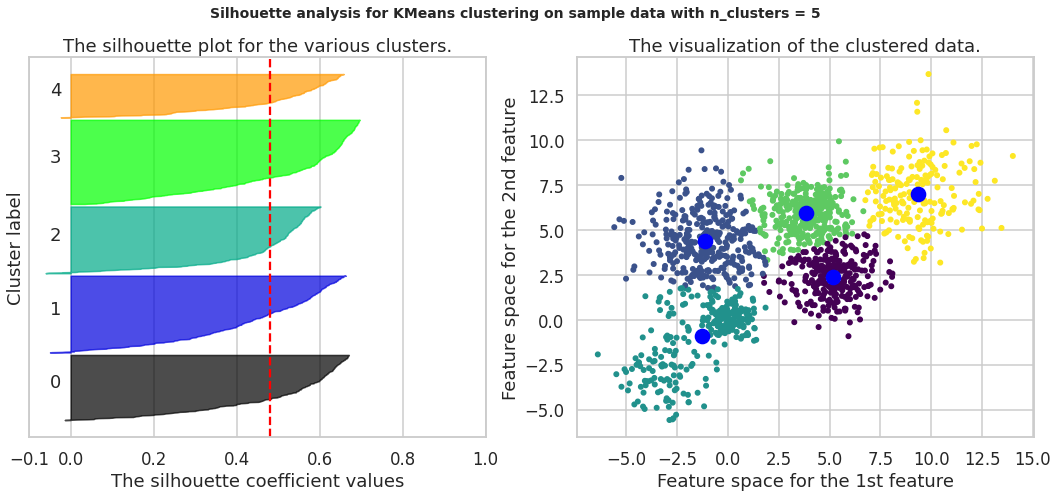

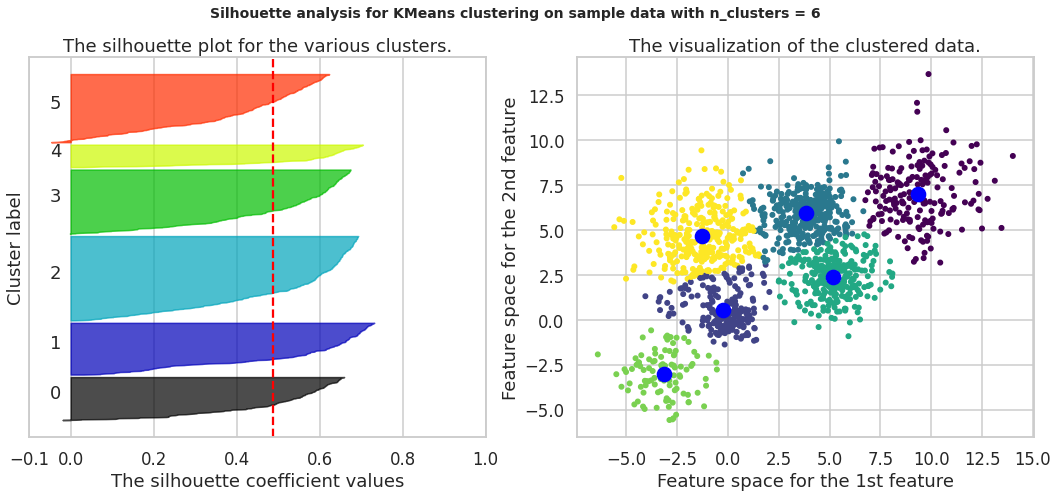

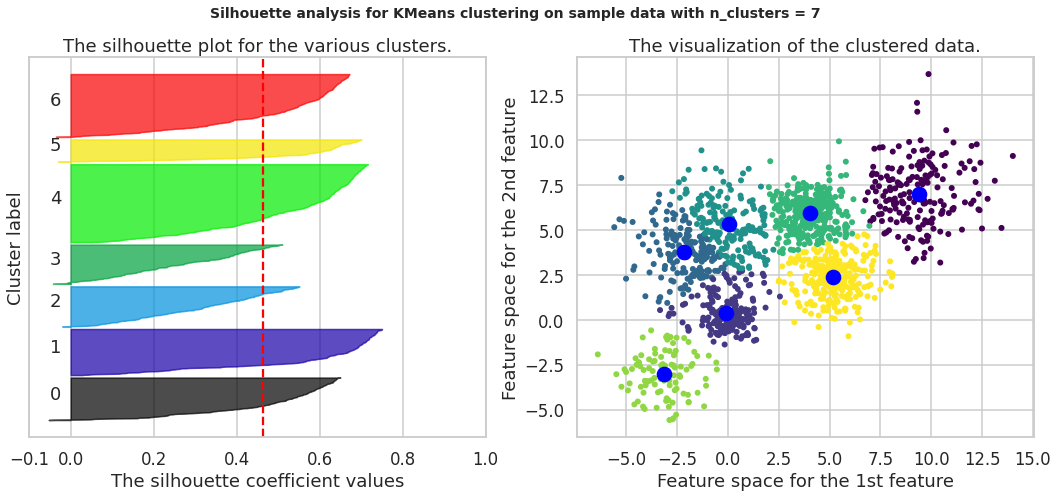

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)
    
    
    kmeans = KMeans(n_clusters,random_state=10)
    p = kmeans.fit_predict(Multi_blob_Data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Multi_blob_Data, p)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Multi_blob_Data, p)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[p == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper), 0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])# Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    ax2.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=p, s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1);
  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Multi_blob_Data)
#scaled_features
#kmeans = KMeans(n_clusters=2, random_state=0).fit(Multi_blob_Data)
#print(kmeans)
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
#kmeans.fit(Multi_blob_Data)
#kmeans.inertia_
#kmeans.cluster_centers_
#kmeans.n_iter_
#kmeans.labels_[:5]
label = kmeans.fit_predict(Multi_blob_Data)
print(label)

[1 1 1 ... 0 0 0]


In [7]:
kmeans = KMeans(init="random",n_clusters=10,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(Multi_blob_Data)
print(label)

[2 2 2 ... 5 8 5]


In [8]:
kmeans = KMeans(init="random",n_clusters=50,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(Multi_blob_Data)
print(label)

[37 16 37 ... 10 33 47]


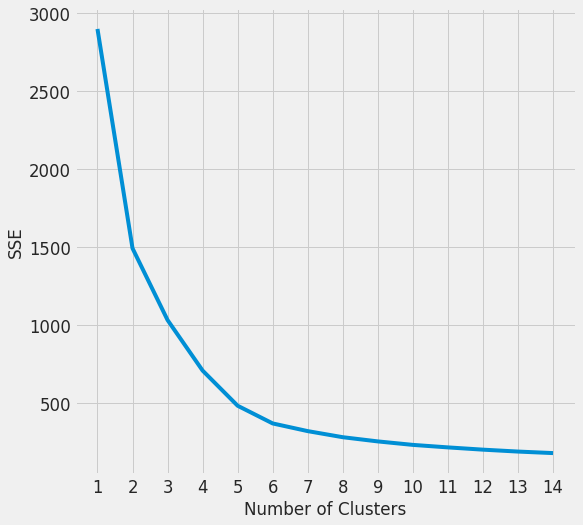

In [9]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
!pip install kneed
from kneed import KneeLocator

In [11]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
print("The optimal number of K is : "+str(kl.elbow))

The optimal number of K is : 5


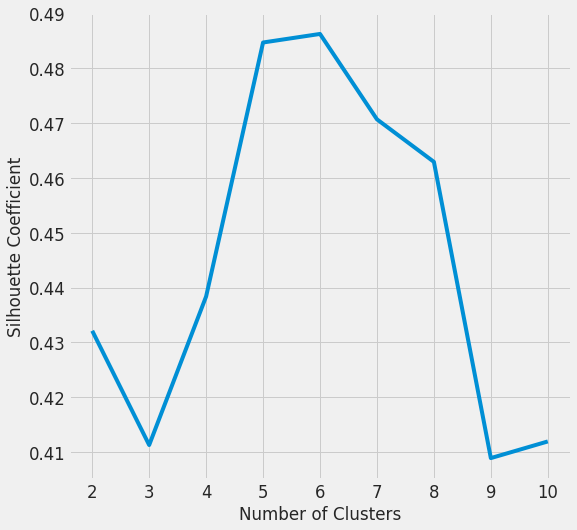

In [12]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

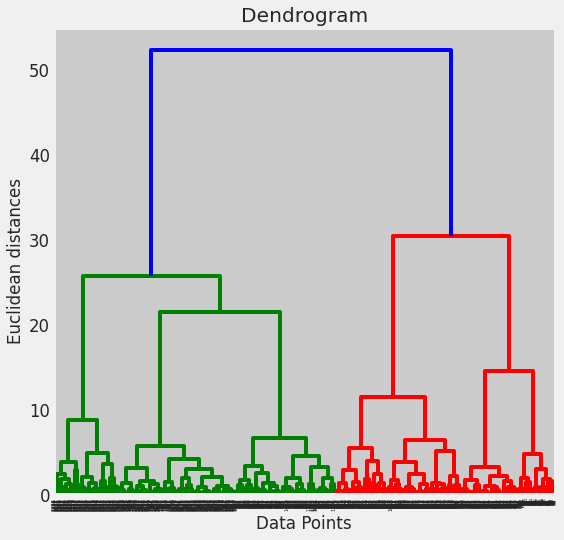

In [13]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Data Points') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show() # show the dendrogram

In [24]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
'''
we need to create an AgglomerativeClustering object, and in it, we pass the following parameters:
n_cluster= 5, the number of clusters our model should return
affinity=euclidean, specify metric to be used to calculate distances
linkage= ward to regulate how distance calculation will be carried out between different clusters.
'''
Agg_euc = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'average',distance_threshold=10)
Agg_euc.fit_predict(scaled_features)

Agg_man = AgglomerativeClustering(n_clusters = None, affinity = 'manhattan', linkage = 'average',distance_threshold=10)
Agg_man.fit_predict(scaled_features)

Agg_cos = AgglomerativeClustering(n_clusters = None, affinity = 'cosine', linkage = 'average',distance_threshold=10)
Agg_cos.fit_predict(scaled_features)

Agg_euc_single = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'single',distance_threshold=10)
Agg_euc_single.fit_predict(scaled_features)

Agg_man_single = AgglomerativeClustering(n_clusters = None, affinity = 'manhattan', linkage = 'single',distance_threshold=10)
Agg_man_single.fit_predict(scaled_features)

Agg_cos_single = AgglomerativeClustering(n_clusters = None, affinity = 'cosine', linkage = 'single',distance_threshold=10)
Agg_cos_single.fit_predict(scaled_features)

#n_clusters_e = 1+np.amax(Agg_hc.labels_)

# plotting cluster 1
#plt.scatter(scaled_features[y_hc == 0, 0], scaled_features[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # plotting cluster 2
#plt.scatter(scaled_features[y_hc == 1, 0], scaled_features[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # plotting cluster 3
#plt.scatter(scaled_features[y_hc == 2, 0], scaled_features[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # plotting cluster 4
#plt.scatter(scaled_features[y_hc == 3, 0], scaled_features[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  # plotting cluster 5
#plt.scatter(scaled_features[y_hc == 4, 0], scaled_features[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plot title addition
#plt.title('Clusters of Data Points')
# labelling the x-axis
#plt.xlabel('Annual Income (k$)')
# label of the y-axis
#plt.ylabel('Spending Score (1-100)')
# printing the legend
#plt.legend()
# show the plot
#plt.show()
#dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward')) # finding the optimal number of clusters using dendrogram
#plt.title('Dendrogram') # title of the dendrogram
#plt.xlabel('Data Points') # label of the x-axis
#plt.ylabel('Euclidean distances') # label of the y-axis
#plt.show() # show the dendrogram


array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn import metrics
Agg_cos.labels_
#metrics.silhouette_score(scaled_features,Agg_euc.labels_)


array([0, 0, 0, ..., 0, 0, 0])

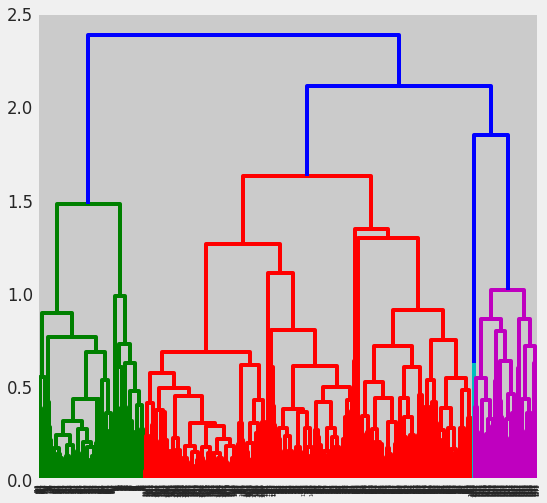

In [43]:
plot_dendrogram(Agg_euc)

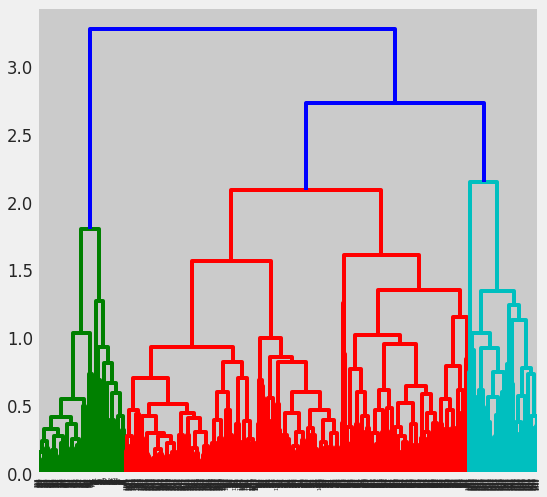

In [44]:
plot_dendrogram(Agg_man)

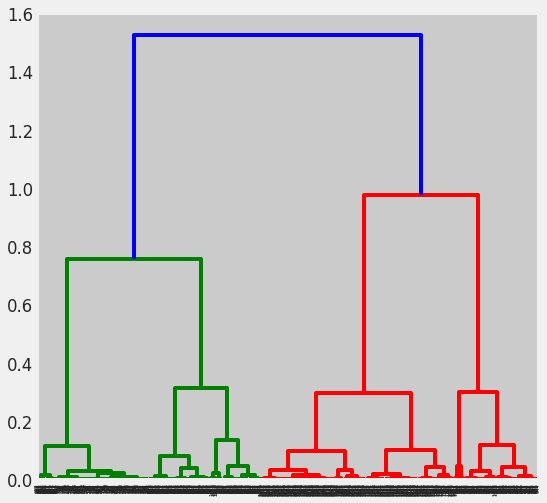

In [45]:
plot_dendrogram(Agg_cos)

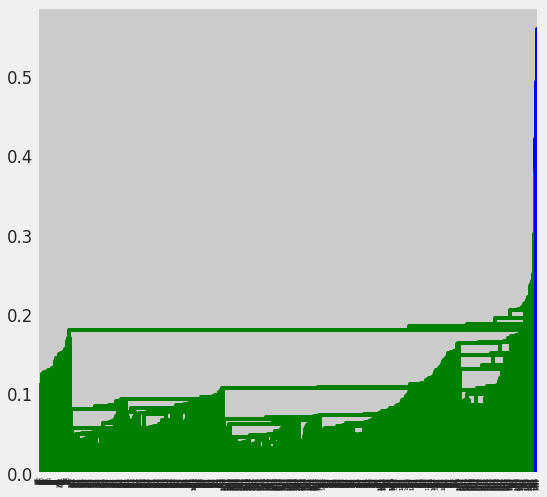

In [46]:
plot_dendrogram(Agg_euc_single)

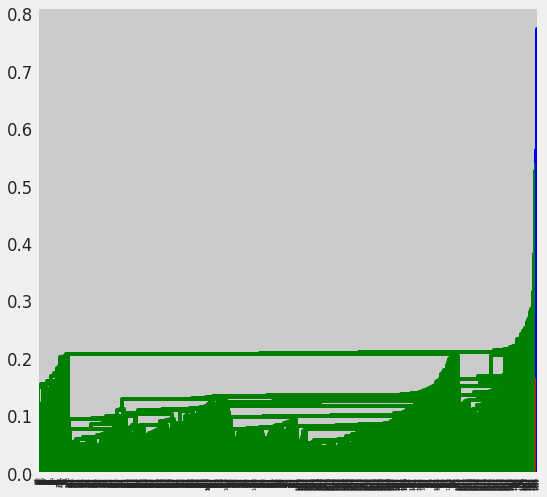

In [47]:
plot_dendrogram(Agg_man_single)

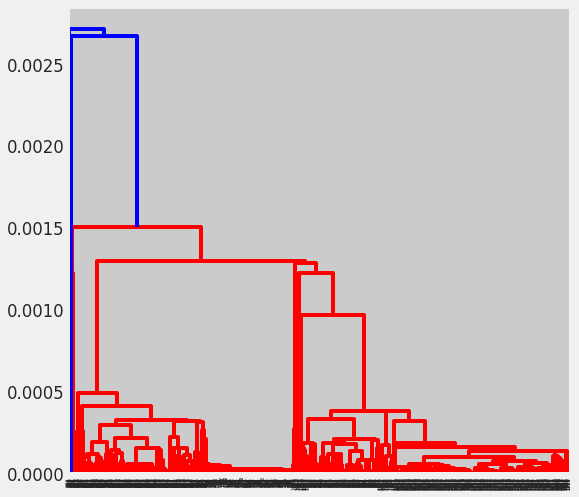

In [48]:
plot_dendrogram(Agg_cos_single)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Number of clusters points : 7
Number of noise points : 427
0.11649836570227529


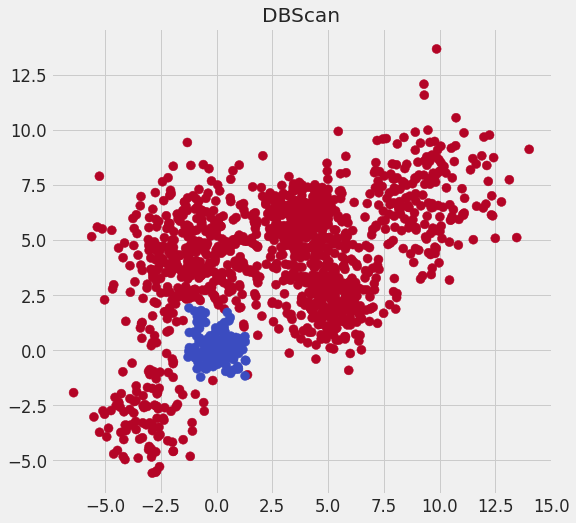

In [121]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=0.5, min_samples=10).fit(Multi_blob_Data)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

2
13
0.38142150144553405


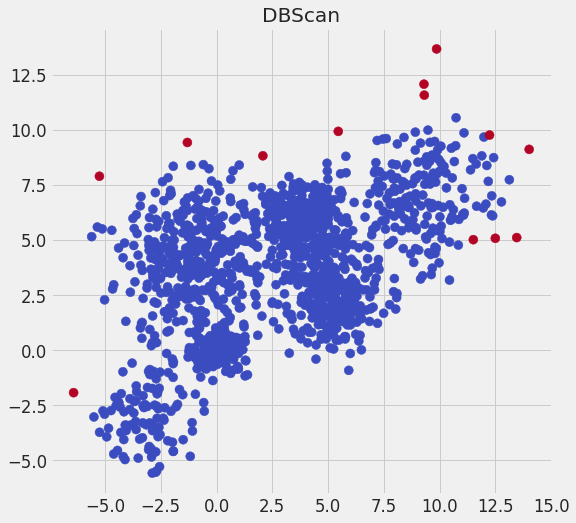

In [95]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=1, min_samples=5).fit(Multi_blob_Data)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

2
16
0.39588689485548345


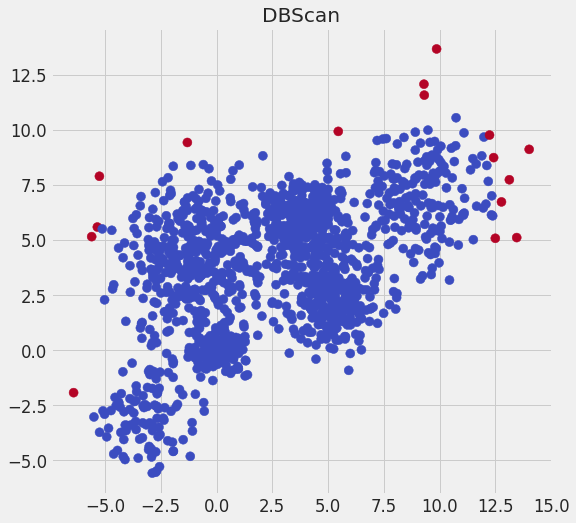

In [102]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=1.5, min_samples=25).fit(Multi_blob_Data)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

5
942
-0.12427145970217895


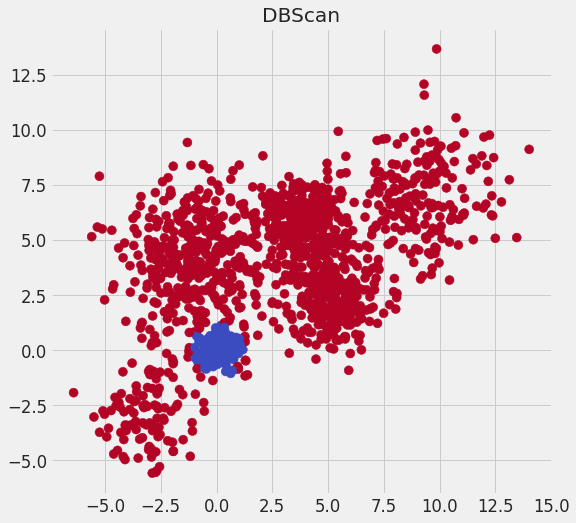

In [105]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=0.5, min_samples=25).fit(Multi_blob_Data)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

2
4
0.45215281991794654


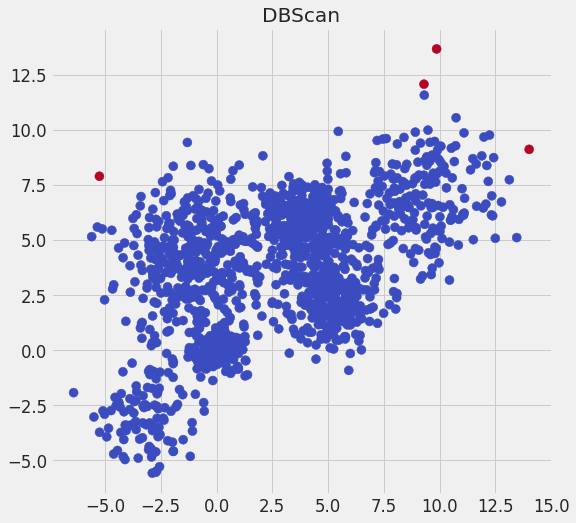

In [114]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=2, min_samples=25).fit(Multi_blob_Data)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [179]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from sklearn.preprocessing import StandardScaler 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import mixture

%matplotlib inline


In [199]:
EM= mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=45)
L=EM.fit(scaled_features)
cluster = EM.predict(scaled_features)
cluster_p= EM.predict_proba(scaled_features)
#cluster_p
print(cluster_p)

silhouette_score(scaled_features,cluster)
#print(scaled_features)
#scaled_features[0:1450]=cluster
#(ggplot(scaled_features ,aes(x="test",y="test1",color="cluster")) +geom_point())


[[1.84260173e-18 1.00000000e+00 9.71874634e-16]
 [7.51416956e-15 1.00000000e+00 8.90727890e-14]
 [4.01467676e-22 1.00000000e+00 2.03122697e-17]
 ...
 [6.23521049e-14 5.94713543e-07 9.99999405e-01]
 [4.02547416e-01 3.15112496e-02 5.65941334e-01]
 [2.70616800e-05 6.70916067e-07 9.99972267e-01]]


0.3687239343251341

0.42785480050491803
[[1.84260173e-18 1.00000000e+00 9.71874634e-16]
 [7.51416956e-15 1.00000000e+00 8.90727890e-14]
 [4.01467676e-22 1.00000000e+00 2.03122697e-17]
 ...
 [6.23521049e-14 5.94713543e-07 9.99999405e-01]
 [4.02547416e-01 3.15112496e-02 5.65941334e-01]
 [2.70616800e-05 6.70916067e-07 9.99972267e-01]]


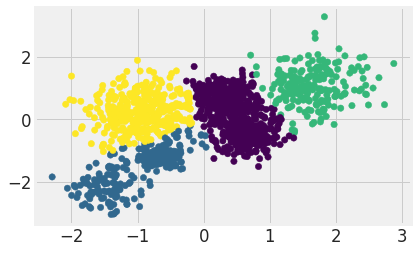

In [206]:
#EM= mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=45)

gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=45).fit(scaled_features)
labels = gmm.predict(scaled_features)
print(silhouette_score(scaled_features,labels))
cluster_p= EM.predict_proba(scaled_features)
#cluster_p
print(cluster_p)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, s=40, cmap='viridis');

0.38074639937111504
[[1.84260173e-18 1.00000000e+00 9.71874634e-16]
 [7.51416956e-15 1.00000000e+00 8.90727890e-14]
 [4.01467676e-22 1.00000000e+00 2.03122697e-17]
 ...
 [6.23521049e-14 5.94713543e-07 9.99999405e-01]
 [4.02547416e-01 3.15112496e-02 5.65941334e-01]
 [2.70616800e-05 6.70916067e-07 9.99972267e-01]]


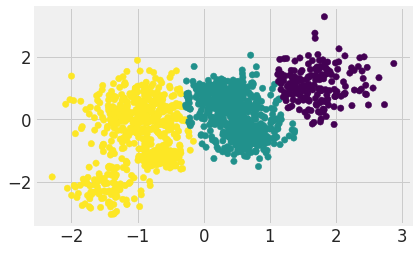

In [207]:
#EM= mixture.GaussianMixture(n_components=3, covariance_type='diag', random_state=45)

gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag', random_state=40).fit(scaled_features)
labels = gmm.predict(scaled_features)
print(silhouette_score(scaled_features,labels))
cluster_p= EM.predict_proba(scaled_features)
#cluster_p
print(cluster_p)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, s=40, cmap='viridis');

0.4156234749317609
[[1.84260173e-18 1.00000000e+00 9.71874634e-16]
 [7.51416956e-15 1.00000000e+00 8.90727890e-14]
 [4.01467676e-22 1.00000000e+00 2.03122697e-17]
 ...
 [6.23521049e-14 5.94713543e-07 9.99999405e-01]
 [4.02547416e-01 3.15112496e-02 5.65941334e-01]
 [2.70616800e-05 6.70916067e-07 9.99972267e-01]]


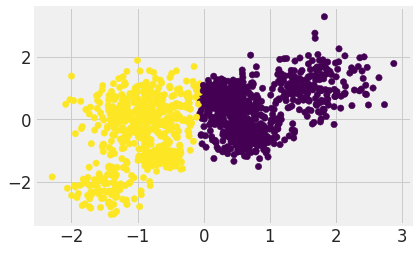

In [208]:
#EM= mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=45)

gmm = mixture.GaussianMixture(n_components=2, covariance_type='tied', random_state=45).fit(scaled_features)
labels = gmm.predict(scaled_features)
print(silhouette_score(scaled_features,labels))
cluster_p= EM.predict_proba(scaled_features)
#cluster_p
print(cluster_p)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, s=40, cmap='viridis');

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [60]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [213]:
mydf= pd.read_csv("/content/Customer data.csv")
mydf.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


For n_clusters = 2 The average silhouette_score is : 0.5828454744042129
For n_clusters = 3 The average silhouette_score is : 0.51124664997564
For n_clusters = 4 The average silhouette_score is : 0.5411295965394681
For n_clusters = 5 The average silhouette_score is : 0.5374634299114787
For n_clusters = 6 The average silhouette_score is : 0.5396378521975496
For n_clusters = 7 The average silhouette_score is : 0.5245015460896748


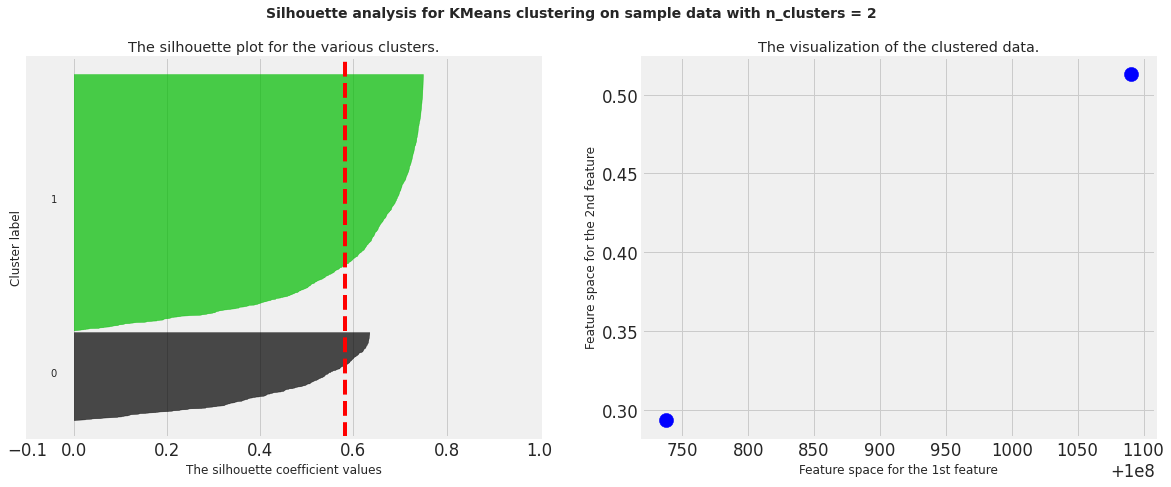

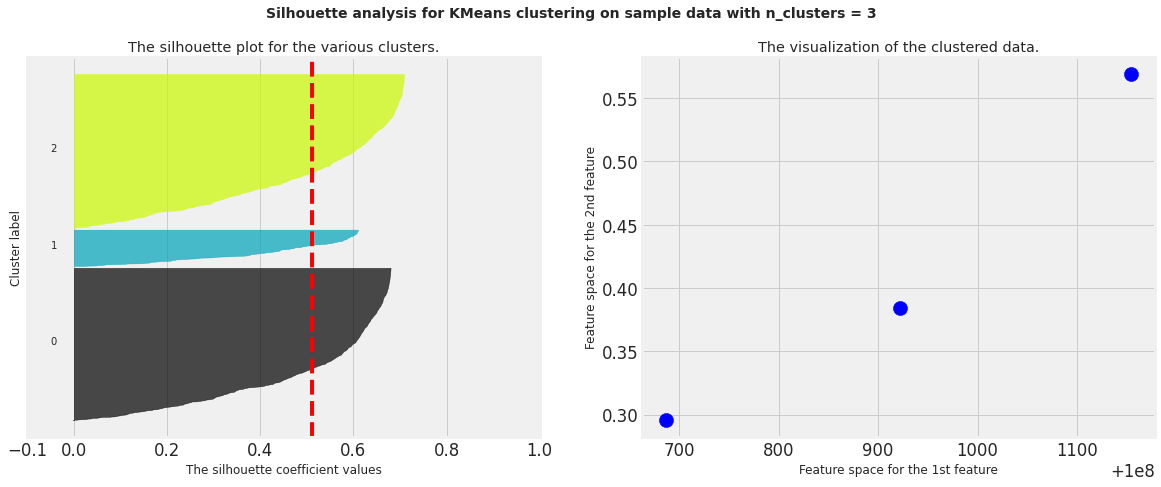

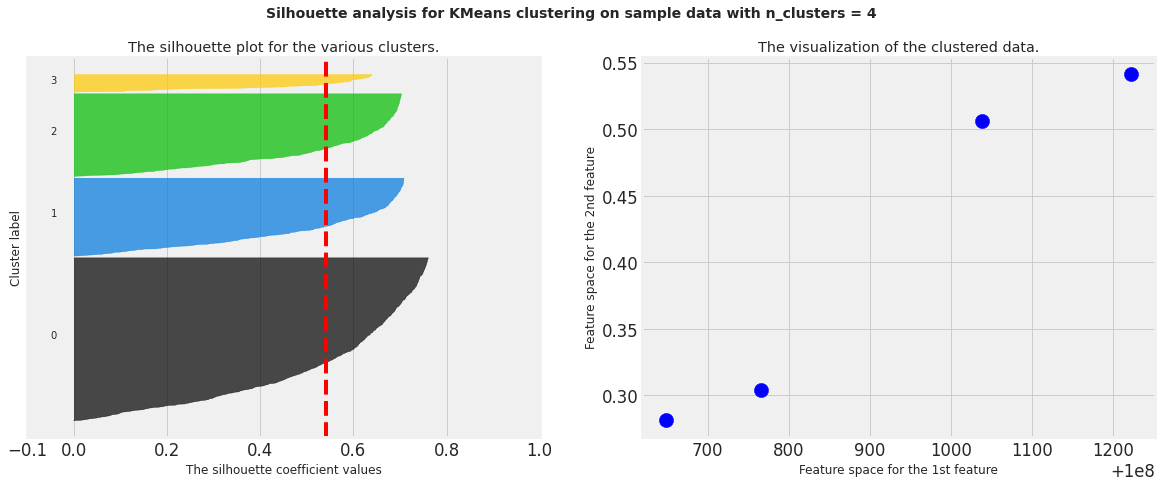

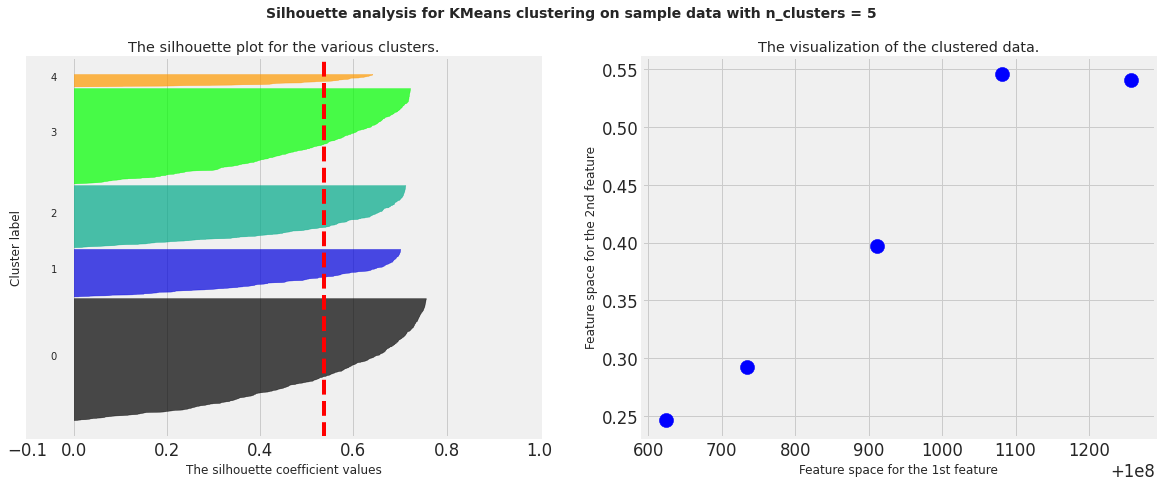

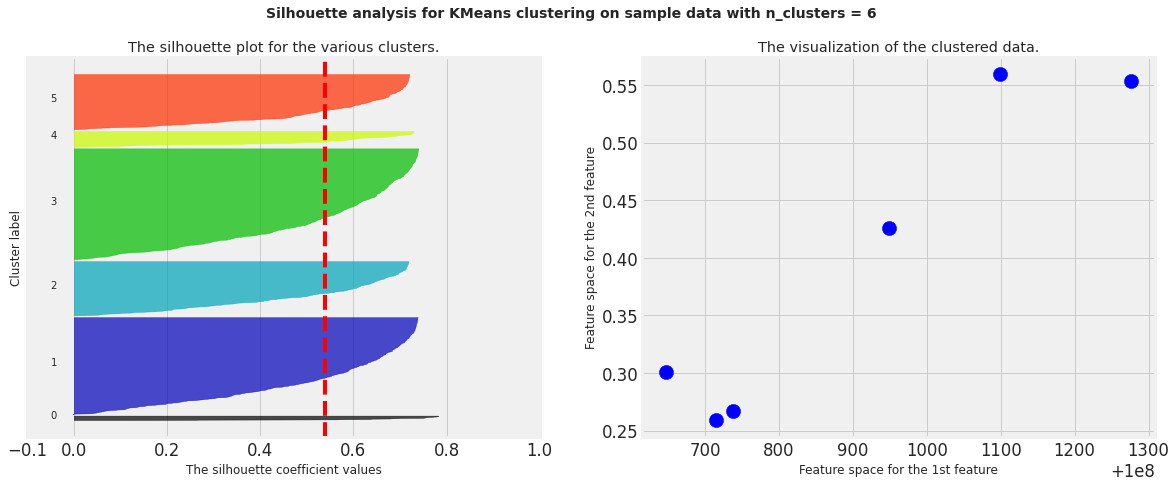

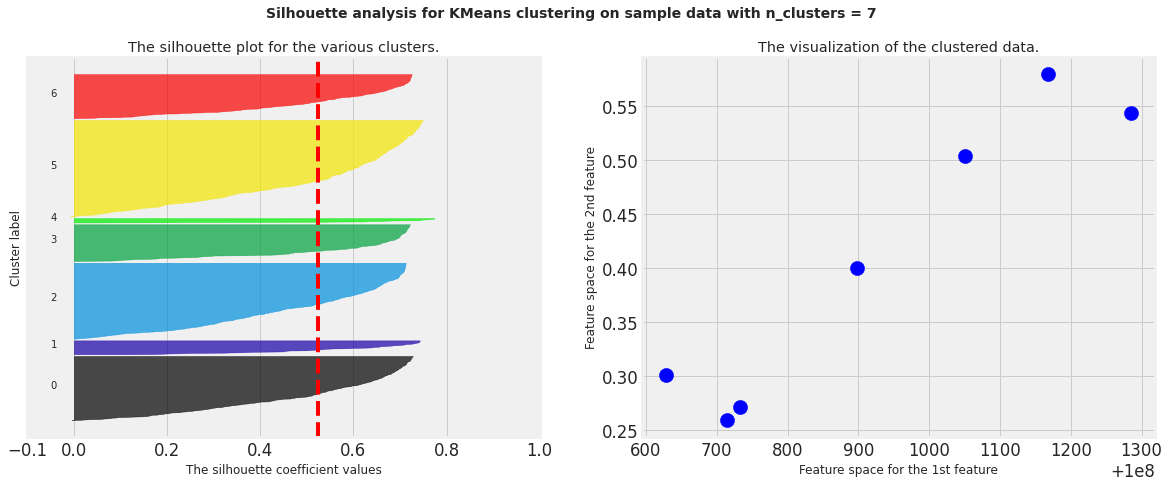

In [215]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)
    
    
    kmeans = KMeans(n_clusters,random_state=10)
    p = kmeans.fit_predict(mydf)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(mydf, p)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(mydf, p)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[p == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper), 0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])# Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    #ax2.scatter(mydf[:,0], mydf[:,1], c=p, s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1);
  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(mydf)
#scaled_features
#kmeans = KMeans(n_clusters=2, random_state=0).fit(Multi_blob_Data)
#print(kmeans)
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
#kmeans.fit(Multi_blob_Data)
#kmeans.inertia_
#kmeans.cluster_centers_
#kmeans.n_iter_
#kmeans.labels_[:5]
label = kmeans.fit_predict(mydf)
print(label)

[2 2 0 ... 0 0 0]


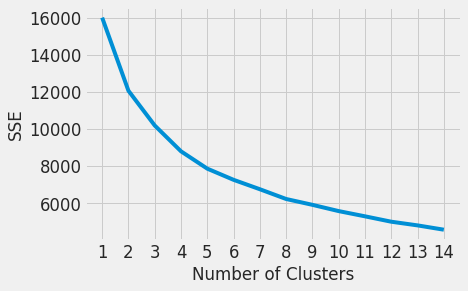

In [222]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse1 = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features1)
  sse1.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [223]:
kl = KneeLocator(range(1, 15), sse1, curve="convex", direction="decreasing")
print("The optimal number of K is : "+str(kl.elbow))

The optimal number of K is : 5


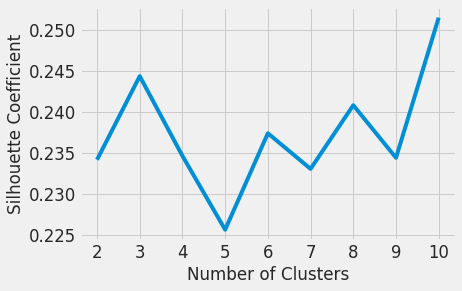

In [224]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features1)
  score = silhouette_score(scaled_features1, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [226]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
'''
we need to create an AgglomerativeClustering object, and in it, we pass the following parameters:
n_cluster= 5, the number of clusters our model should return
affinity=euclidean, specify metric to be used to calculate distances
linkage= ward to regulate how distance calculation will be carried out between different clusters.
'''
Agg_euc1 = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'average',distance_threshold=10)
Agg_euc1.fit_predict(scaled_features1)

Agg_man1 = AgglomerativeClustering(n_clusters = None, affinity = 'manhattan', linkage = 'average',distance_threshold=10)
Agg_man1.fit_predict(scaled_features1)

Agg_cos1 = AgglomerativeClustering(n_clusters = None, affinity = 'cosine', linkage = 'average',distance_threshold=10)
Agg_cos1.fit_predict(scaled_features1)

Agg_euc1_single = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'single',distance_threshold=10)
Agg_euc1_single.fit_predict(scaled_features1)

Agg_man1_single = AgglomerativeClustering(n_clusters = None, affinity = 'manhattan', linkage = 'single',distance_threshold=10)
Agg_man1_single.fit_predict(scaled_features1)

Agg_cos1_single = AgglomerativeClustering(n_clusters = None, affinity = 'cosine', linkage = 'single',distance_threshold=10)
Agg_cos1_single.fit_predict(scaled_features1)

#n_clusters_e = 1+np.amax(Agg_hc.labels_)

# plotting cluster 1
#plt.scatter(scaled_features[y_hc == 0, 0], scaled_features[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # plotting cluster 2
#plt.scatter(scaled_features[y_hc == 1, 0], scaled_features[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # plotting cluster 3
#plt.scatter(scaled_features[y_hc == 2, 0], scaled_features[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # plotting cluster 4
#plt.scatter(scaled_features[y_hc == 3, 0], scaled_features[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  # plotting cluster 5
#plt.scatter(scaled_features[y_hc == 4, 0], scaled_features[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plot title addition
#plt.title('Clusters of Data Points')
# labelling the x-axis
#plt.xlabel('Annual Income (k$)')
# label of the y-axis
#plt.ylabel('Spending Score (1-100)')
# printing the legend
#plt.legend()
# show the plot
#plt.show()
#dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward')) # finding the optimal number of clusters using dendrogram
#plt.title('Dendrogram') # title of the dendrogram
#plt.xlabel('Data Points') # label of the x-axis
#plt.ylabel('Euclidean distances') # label of the y-axis
#plt.show() # show the dendrogram


array([0, 0, 0, ..., 0, 0, 0])

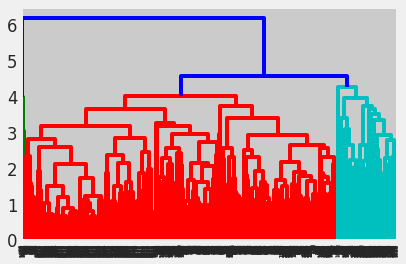

In [227]:
plot_dendrogram(Agg_euc1)

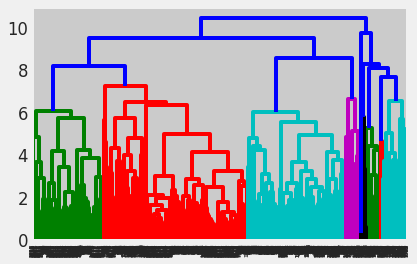

In [228]:
plot_dendrogram(Agg_man1)

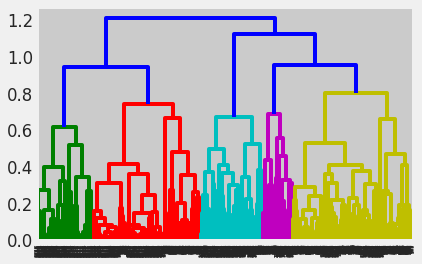

In [229]:
plot_dendrogram(Agg_cos1)

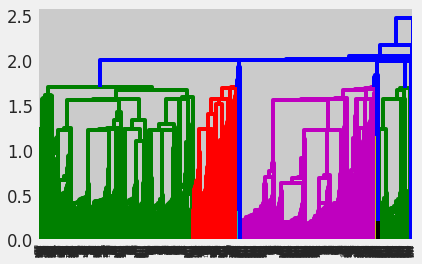

In [230]:
plot_dendrogram(Agg_euc1_single)

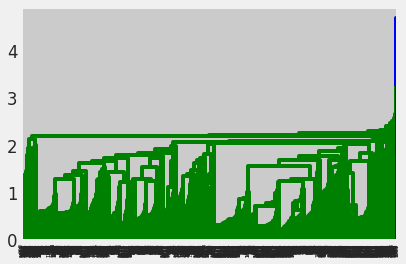

In [231]:
plot_dendrogram(Agg_man1_single)

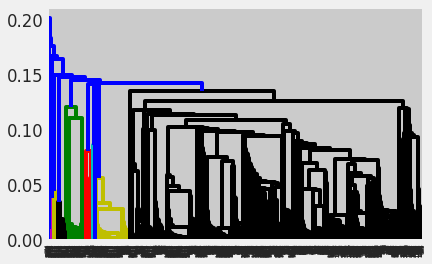

In [232]:
plot_dendrogram(Agg_cos1_single)

Number of clusters points : 54
Number of noise points : 187
0.2781300728923167


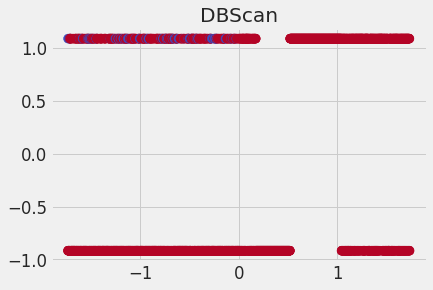

In [234]:
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=1, min_samples=5).fit(scaled_features1)
L=DBSCAN_cluster.labels_
no_clusters = len(np.unique(L))
no_noise = np.sum(np.array(L) == -1, axis=0)
print("Number of clusters points : "+str(no_clusters))
print("Number of noise points : "+str(no_noise))
print(metrics.silhouette_score(scaled_features1,DBSCAN_cluster.labels_))
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', L))
plt.scatter(scaled_features1[:,0],scaled_features1[:,1], c=colors, marker="o", picker=True)
plt.title('DBScan')
plt.show()

0.1748789370670087
[[1.84260173e-18 1.00000000e+00 9.71874634e-16]
 [7.51416956e-15 1.00000000e+00 8.90727890e-14]
 [4.01467676e-22 1.00000000e+00 2.03122697e-17]
 ...
 [6.23521049e-14 5.94713543e-07 9.99999405e-01]
 [4.02547416e-01 3.15112496e-02 5.65941334e-01]
 [2.70616800e-05 6.70916067e-07 9.99972267e-01]]


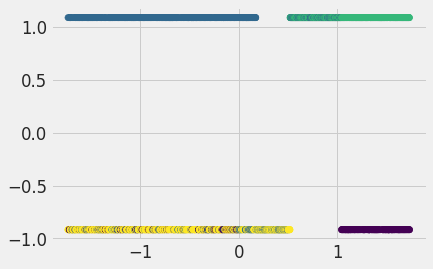

In [243]:
#EM= mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=45)

gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=45).fit(scaled_features1)
labels1 = gmm.predict(scaled_features1)
print(silhouette_score(scaled_features1,labels1))
#cluster_p= EM.predict_proba(scaled_features1)
#cluster_p
print(cluster_p)
plt.scatter(scaled_features1[:, 0], scaled_features1[:, 1], c=labels1, s=40, cmap='viridis');